In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
dataset = "mnist"
#dataset = "cifar10"
#nn_type = "cnn"
nn_type = "mlp"

In [4]:
cfg_filename = f"configs/{nn_type}/config-{dataset}.json"

with open(cfg_filename) as cfg_file:
    cfg = json.load(cfg_file)

In [5]:
cfg["RGRAPH"]["SAVE_GRAPH"] = True

In [6]:
param_grid = {
    "sparsities" : [0.5], 
    "rewiring_probabilities" : [0.128],
    "random_seeds" : [4]
}

In [7]:
from src import explore

In [8]:
explore.run_on_param_grid(cfg, param_grid, log = True)

Train
loss : 0.22763555558092557
top1_err : 6.46488539445629
top5_err : 0.5785803042495175
---

Test
top1_err : 2.8579905063291138
top5_err : 0.04944620253164557
---

Train
loss : 0.08345944847442957
top1_err : 2.478678038379531
top5_err : 0.04664179104477612
---

Test
top1_err : 2.2053006329113924
top5_err : 0.08900316455696203
---

Train
loss : 0.05666155348927068
top1_err : 1.7007595948827292
top5_err : 0.024986673773987205
---

Test
top1_err : 2.2547468354430378
top5_err : 0.03955696202531646
---

Train
loss : 0.037774249192958735
top1_err : 1.1721526254723067
top5_err : 0.013326226012793176
---

Test
top1_err : 1.7899525316455696
top5_err : 0.01977848101265823
---

Train
loss : 0.026118183875881405
top1_err : 0.8017945899638032
top5_err : 0.0049973347547974415
---

Test
top1_err : 1.7800632911392404
top5_err : 0.01977848101265823
---

Train
loss : 0.01590364778921731
top1_err : 0.4219971485991976
top5_err : 0.006663113006396588
---

Test
top1_err : 1.4240506329113924
top5_err : 0.

In [9]:
from utils import graph_utils

In [10]:
for sparsity in param_grid["sparsities"]:
    for p in param_grid["rewiring_probabilities"]:
        for seed in param_grid["random_seeds"]:
            out_dir = f"{cfg['OUT_DIR']}/{cfg['MODEL']['TYPE']}/{cfg['TRAIN']['DATASET']}/graphs/{cfg['RGRAPH']['GRAPH_TYPE']}"
            graph = graph_utils.load_graph(f"{out_dir}/gsparsity={sparsity}_p={p}_gseed={seed}.npz")
            print(graph_utils.get_graph_stats(graph))

{'clustering_coefficient': 0.619947269517153, 'average_path_length': 1.4862745098039216}


In [11]:
from utils import log_parser

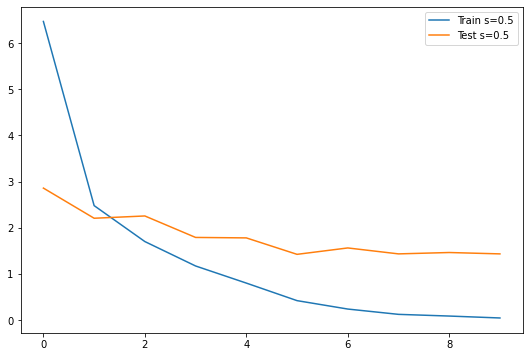

In [13]:

plt.figure(figsize = (9, 6))

for sparsity in param_grid["sparsities"]:
    for p in param_grid["rewiring_probabilities"]:
        for seed in param_grid["random_seeds"]:
            out_dir = f"{cfg['OUT_DIR']}/{cfg['MODEL']['TYPE']}/{cfg['TRAIN']['DATASET']}/logs/{cfg['RGRAPH']['GRAPH_TYPE']}"
            train_stats, test_stats = log_parser.parse_log(f"{out_dir}/log_gsparsity={sparsity}_p={p}_gseed={seed}.txt")
            
            plt.plot(train_stats[:, 1], label = f"Train s={sparsity}")
            plt.plot(test_stats[:, 0], label = f"Test s={sparsity}")
            
plt.legend()